In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
def visualize_preds(table,y_true, y_pred, title):
    ls = []
    f = plt.figure(figsize = (8,8))
    cf = confusion_matrix(y_true, y_pred)
    sb.heatmap(cf, fmt='.0f', annot=True)
    
    accuracy  = np.trace(cf) / float(np.sum(cf))

    # Metrics for Binary Confusion Matrices
    if sum(cf[:,1]) == 0:
        precision = 0.0;
    else:
        precision = cf[1,1] / sum(cf[:,1])
        
    if sum(cf[1,:]) == 0:
        recall = 0.0;
    else:
        recall    = cf[1,1] / sum(cf[1,:])
        
    if (precision + recall) == 0:
        f1_score = 0.0;
    else:
        f1_score  = 2 *precision * recall / (precision + recall)
    stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
        accuracy,precision,recall,f1_score)
    
    ls.append(accuracy)
    ls.append(precision)
    ls.append(recall)
    ls.append(f1_score)
    ls = pd.DataFrame(ls)
    table = pd.concat([table,ls], axis = 1)
    
    plt.xlabel('Predicted' + stats_text)
    plt.ylabel('Actual')
    plt.title(title)
    
    return table

In [4]:
table1 = pd.DataFrame()
table2 = pd.DataFrame()

## Importing data

In [5]:
#IMPORTING CLEAN DATA USING RANDOM SAMPLING
train = pd.read_csv("data/train.csv", index_col=0)
train = train.drop(['revenue','decade_released','genres','vote_count'], axis = 1)
train

,popularity,casts_popularity_sum,crews_popularity_sum,budget,is_good
5527,1.680,34.059,8.671,3300000.0,0
3263,18.013,46.018,9.456,26000000.0,0
1022,17.237,182.113,198.986,65000000.0,0
4603,11.931,110.585,44.527,20000000.0,0
2733,14.717,99.835,75.898,51000000.0,0
...,...,...,...,...,...
4447,4.148,18.300,13.422,3230939.0,0
1479,16.122,72.172,50.678,40000000.0,0
8772,1.712,43.027,8.754,577450.0,0
5071,16.830,103.881,108.412,15000000.0,0


In [6]:
#IMPORTING CLEANED TRAIN DATA USING RANDOM OVERSAMPLING SAMPLING
oversampling_train = pd.read_csv("data/oversampled-train.csv", index_col = 0)
oversampling_train = oversampling_train.drop(['revenue','genres','decade_released','vote_count'], axis = 1)
oversampling_train

,popularity,casts_popularity_sum,crews_popularity_sum,budget,is_good
0,1.680,34.059,8.671,3300000.0,0
1,18.013,46.018,9.456,26000000.0,0
2,17.237,182.113,198.986,65000000.0,0
3,11.931,110.585,44.527,20000000.0,0
4,14.717,99.835,75.898,51000000.0,0
...,...,...,...,...,...
5891,37.911,85.372,41.670,140000000.0,1
5892,71.879,147.898,256.890,150000000.0,1
5893,26.437,124.173,266.202,76000000.0,1
5894,27.112,74.206,38.326,5000000.0,1


In [7]:
#IMPORTING CLEANED TRAIN DATA USING SMOTEENN SAMPLING
smoteenn_train = pd.read_csv("data/smoteenn-train.csv", index_col = 0)
smoteenn_train = smoteenn_train.drop(['revenue','vote_count'], axis = 1)
smoteenn_train

,popularity,casts_popularity_sum,crews_popularity_sum,budget,is_good
0,1.680000,34.059000,8.671000,3.300000e+06,0
1,11.931000,110.585000,44.527000,2.000000e+07,0
2,14.717000,99.835000,75.898000,5.100000e+07,0
3,12.050000,33.433000,10.263000,1.750000e+07,0
4,7.503000,36.672000,13.520000,1.600000e+05,0
...,...,...,...,...,...
3690,4.073709,4.324492,10.265746,1.488598e+05,1
3691,67.239940,80.192475,41.951580,1.549019e+07,1
3692,21.451971,137.467166,43.816913,9.171183e+07,1
3693,33.474275,118.201078,48.248315,1.265054e+07,1


In [8]:
#IMPORTING CLEANED TRAIN DATA USING SMOTETOMEK SAMPLING
smotetomek_train = pd.read_csv("data/smotetomek-train.csv", index_col = 0)
smotetomek_train = smotetomek_train.drop(['revenue','vote_count'], axis = 1)
smotetomek_train

,popularity,casts_popularity_sum,crews_popularity_sum,budget,is_good
0,1.680000,34.059000,8.671000,3.300000e+06,0
1,18.013000,46.018000,9.456000,2.600000e+07,0
2,11.931000,110.585000,44.527000,2.000000e+07,0
3,14.717000,99.835000,75.898000,5.100000e+07,0
4,23.357000,99.896000,62.278000,3.200000e+07,0
...,...,...,...,...,...
6857,21.451971,137.467166,43.816913,9.171183e+07,1
6858,33.474275,118.201078,48.248315,1.265054e+07,1
6859,26.421068,134.796016,25.145178,4.294768e+06,1
6860,12.187359,37.095476,24.018535,3.327034e+06,1


In [9]:
#IMPORTING CLEANED TEST DATASETS
test = pd.read_csv("data/test.csv", index_col = 0)
test = test.drop(['revenue','genres','decade_released','vote_count'], axis = 1)
test

,popularity,casts_popularity_sum,crews_popularity_sum,budget,is_good
6183,10.639,53.101,21.680,5800000.0,0
786,48.052,100.519,97.495,60000000.0,0
100,37.487,255.221,181.062,170000000.0,1
4763,19.589,83.531,99.984,80000000.0,0
429,27.201,121.827,136.950,40000000.0,1
...,...,...,...,...,...
1702,10.985,66.930,20.929,37000000.0,0
7958,2.867,20.298,5.676,1200000.0,0
5684,14.063,35.806,34.015,7000000.0,0
8122,4.678,11.597,5.905,10000000.0,0


## 1. Classification of train by Logistic Regression

In [10]:
#Assign x and y value
y_train = train['is_good']
x_train = train.drop(['is_good'], axis = 1) # Remove the response variable
y_test = test['is_good']
x_test = test.drop(['is_good'], axis = 1) # Remove the response variable

#The correlation of data
train.corr()

,popularity,casts_popularity_sum,crews_popularity_sum,budget,is_good
popularity,1.000000,0.276604,0.262988,0.298602,0.089654
casts_popularity_sum,0.276604,1.000000,0.547721,0.627959,0.087012
crews_popularity_sum,0.262988,0.547721,1.000000,0.606373,0.109554
budget,0.298602,0.627959,0.606373,1.000000,0.001421
is_good,0.089654,0.087012,0.109554,0.001421,1.000000


In [11]:
#Calculate the odd of a movie is good
print("The odds of a movie is good in train dataset is\t: ", y_train.value_counts()[1]/y_train.value_counts()[0])

#Perform the logistics regression
logreg1 = LogisticRegression()
 
#Fit the data
logreg1.fit(x_train,y_train)

#Print out the mean acuuracy
print("The overall classification accuracy \t\t: ", logreg1.score(x_test,y_test))

The odds of a movie is good in train dataset is	:  0.258967183922666
The overall classification accuracy 		:  0.7779349363507779


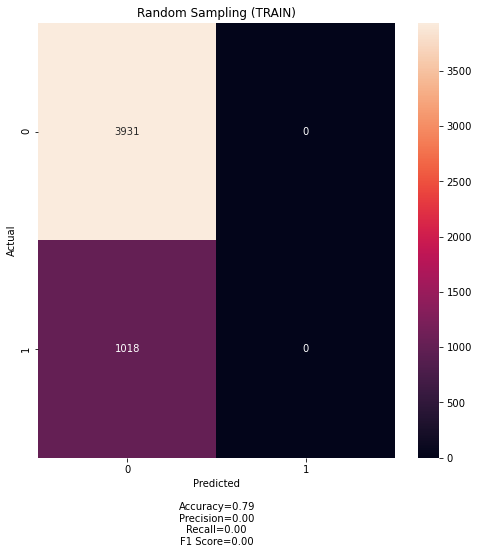

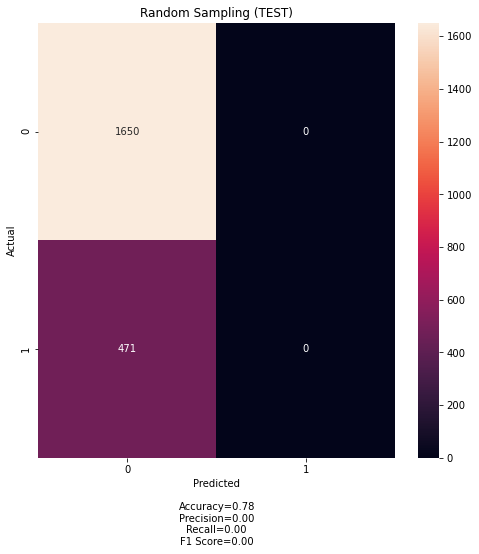

In [12]:
#Predict the data
y_train_pred = logreg1.predict(x_train)
y_test_pred = logreg1.predict(x_test)

#Visualizing the data
table1 = visualize_preds(table1,y_train,y_train_pred, title = 'Random Sampling (TRAIN)')
table2 = visualize_preds(table2,y_test,y_test_pred, title = 'Random Sampling (TEST)')

## 2. Classification of oversampling train by Logistic Regression

In [13]:
#Assign x and y value
y_train = oversampling_train['is_good']
x_train = oversampling_train.drop(['is_good'], axis = 1) # Remove the response variable

#The correlation of data
oversampling_train.corr()

,popularity,casts_popularity_sum,crews_popularity_sum,budget,is_good
popularity,1.000000,0.281270,0.253074,0.307970,0.101899
casts_popularity_sum,0.281270,1.000000,0.539087,0.633633,0.095573
crews_popularity_sum,0.253074,0.539087,1.000000,0.595812,0.125451
budget,0.307970,0.633633,0.595812,1.000000,0.002633
is_good,0.101899,0.095573,0.125451,0.002633,1.000000


In [14]:
#Calculate the odd of a movie is good
print("The odds of a movie is good in train dataset is\t: ", y_train.value_counts()[1]/y_train.value_counts()[0])

#Perform the logistics regression
logreg_oversampling = LogisticRegression()
 
#Fit the data
logreg_oversampling.fit(x_train,y_train)

#Print out the mean acuuracy
print("The overall classification accuracy \t\t: ", logreg_oversampling.score(x_test,y_test))

The odds of a movie is good in train dataset is	:  0.49987280590180616
The overall classification accuracy 		:  0.7779349363507779


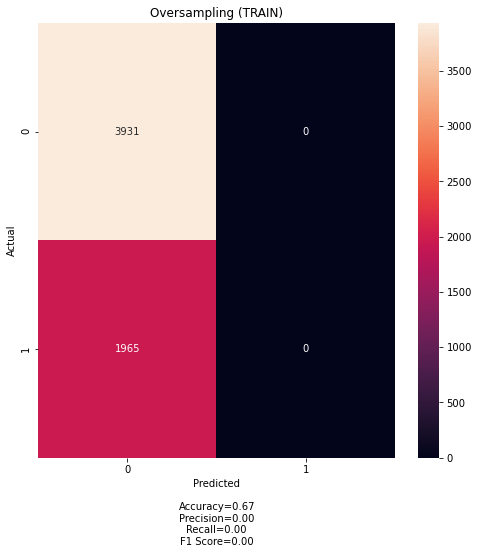

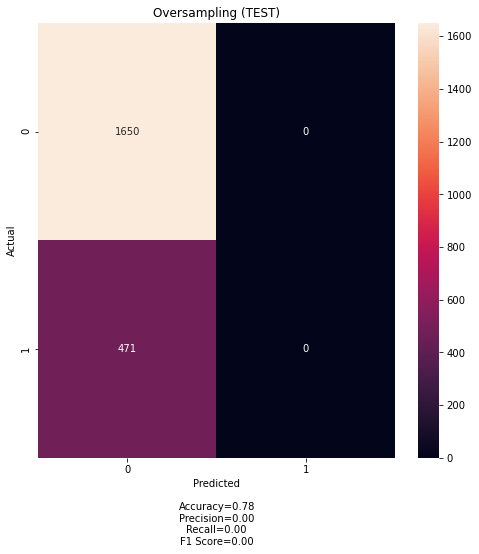

In [15]:
#Predict the data
y_train_pred = logreg_oversampling.predict(x_train)
y_test_pred = logreg_oversampling.predict(x_test)

#Visualizing the data
table1 = visualize_preds(table1,y_train,y_train_pred, title = 'Oversampling (TRAIN)')
table2 = visualize_preds(table2,y_test,y_test_pred,'Oversampling (TEST)')

## 3.Classification of smoteenn train using Logistic Regression

In [16]:
#Assign x and y value
y_train = smoteenn_train['is_good']
x_train = smoteenn_train.drop(['is_good'], axis = 1) # Remove the response variable

#The correlation of data
smoteenn_train.corr()

,popularity,casts_popularity_sum,crews_popularity_sum,budget,is_good
popularity,1.000000,0.380063,0.339282,0.375794,0.152676
casts_popularity_sum,0.380063,1.000000,0.661458,0.722744,0.139101
crews_popularity_sum,0.339282,0.661458,1.000000,0.690586,0.166583
budget,0.375794,0.722744,0.690586,1.000000,0.011166
is_good,0.152676,0.139101,0.166583,0.011166,1.000000


In [17]:
#Calculate the odd of a movie is good
print("The odds of a movie is good in train dataset is\t: ", y_train.value_counts()[1]/y_train.value_counts()[0])

#Perform the logistics regression
logreg_smoteenn = LogisticRegression()
 
#Fit the data
logreg_smoteenn.fit(x_train,y_train)

#Print out the mean acuuracy
print("The overall classification accuracy \t\t: ", logreg_smoteenn.score(x_test,y_test))

The odds of a movie is good in train dataset is	:  1.1042141230068336
The overall classification accuracy 		:  0.22206506364922207


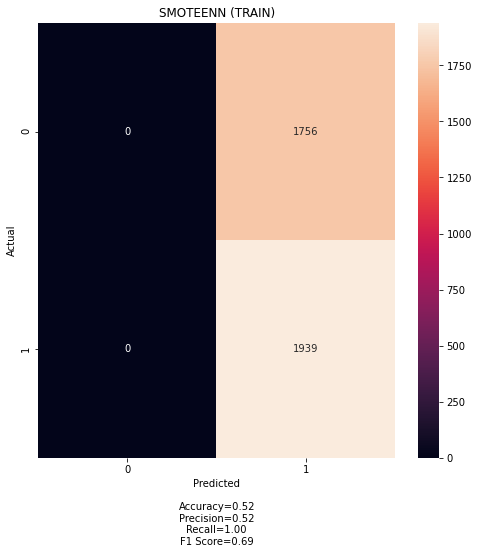

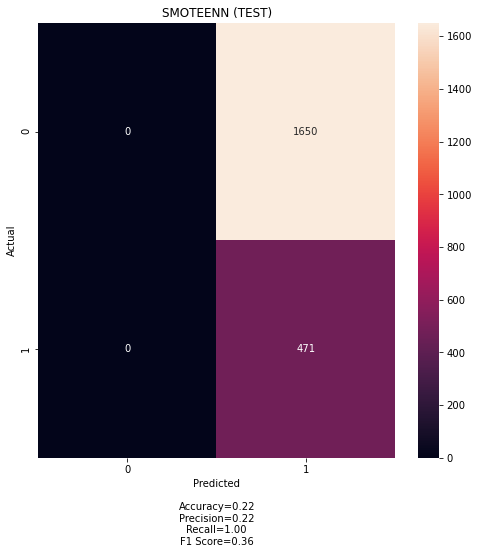

In [18]:
#Predict the data
y_train_pred = logreg_smoteenn.predict(x_train)
y_test_pred = logreg_smoteenn.predict(x_test)

#Visualizing the data
table1 = visualize_preds(table1,y_train,y_train_pred, title = 'SMOTEENN (TRAIN)')
table2 = visualize_preds(table2,y_test,y_test_pred,'SMOTEENN (TEST)')

## 4. Classification of smotetomek train using Logistic Regression

In [19]:
#Assign x and y value
y_train = smotetomek_train['is_good']
x_train = smotetomek_train.drop(['is_good'], axis = 1) # Remove the response variable

#The correlation of data
smotetomek_train.corr()

,popularity,casts_popularity_sum,crews_popularity_sum,budget,is_good
popularity,1.000000,0.325325,0.282471,0.326616,0.121546
casts_popularity_sum,0.325325,1.000000,0.623341,0.684323,0.107451
crews_popularity_sum,0.282471,0.623341,1.000000,0.663896,0.130573
budget,0.326616,0.684323,0.663896,1.000000,-0.000574
is_good,0.121546,0.107451,0.130573,-0.000574,1.000000


In [20]:
#Calculate the odd of a movie is good
print("The odds of a movie is good in train dataset is\t: ", y_train.value_counts()[1]/y_train.value_counts()[0])

#Perform the logistics regression
logreg_smotetomek = LogisticRegression()
 
#Fit the data
logreg_smotetomek.fit(x_train,y_train)

#Print out the mean accuracy
print("The overall classification accuracy \t\t: ", logreg_smotetomek.score(x_test,y_test))

The odds of a movie is good in train dataset is	:  1.0
The overall classification accuracy 		:  0.776991984912777


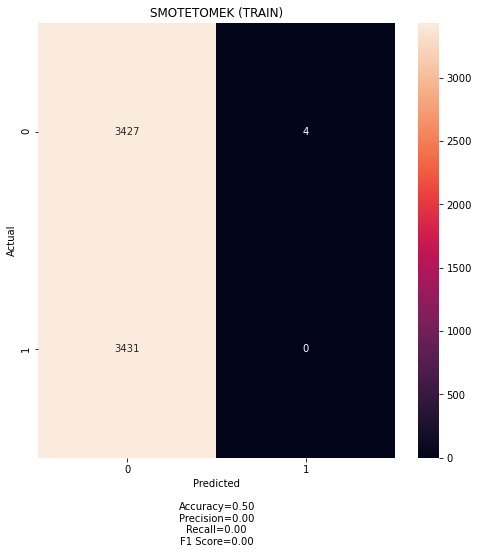

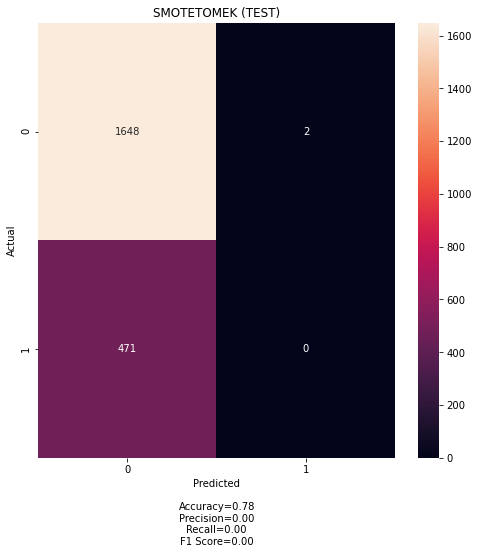

In [21]:
#Predict the data
y_train_pred = logreg_smotetomek.predict(x_train)
y_test_pred = logreg_smotetomek.predict(x_test)

#Visualizing the data
table1 = visualize_preds(table1,y_train,y_train_pred, title = 'SMOTETOMEK (TRAIN)')
table2 = visualize_preds(table2,y_test,y_test_pred,'SMOTETOMEK (TEST)')

In [30]:
def draw_figure(table, row, title):
    plt.figure(figsize=(8, 6))
    plt.title(title)
    plt.ylim([0,1])
    splot = sb.barplot(x = ['Original','Oversampling','SMOTEENN','SMOTETomek'],y = table.iloc[row,:])
    for p in splot.patches:
        if p.get_height() == 0:
            splot.annotate(format(p.get_height(), '.2f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 9), 
                           textcoords = 'offset points')
        else:
            splot.annotate(format(p.get_height(), '.2f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, -12), 
                           textcoords = 'offset points')
    

In [31]:
table1 = table1.set_axis(['Original','Oversampling','SMOTEENN','SMOTETomek'],axis = 1)
table1 = table1.set_axis(['Accuracy','Precision','Recall','f1 Score'],axis = 0)
#table1.to_csv('train.csv')
table1

,Original,Oversampling,SMOTEENN,SMOTETomek
Accuracy,0.794302,0.666723,0.524763,0.499417
Precision,0.000000,0.000000,0.524763,0.000000
Recall,0.000000,0.000000,1.000000,0.000000
f1 Score,0.000000,0.000000,0.688321,0.000000


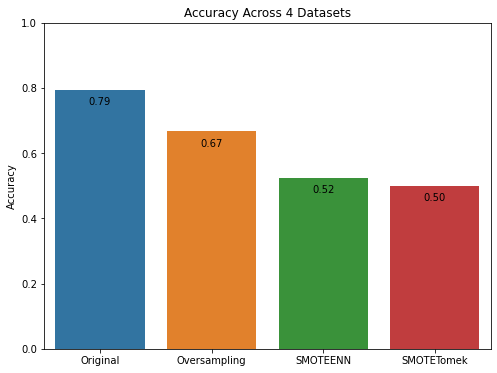

In [32]:
draw_figure(table1,0,"Accuracy Across 4 Datasets")

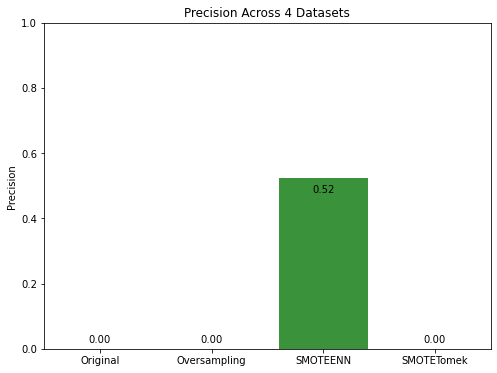

In [33]:
draw_figure(table1, 1 ,"Precision Across 4 Datasets")

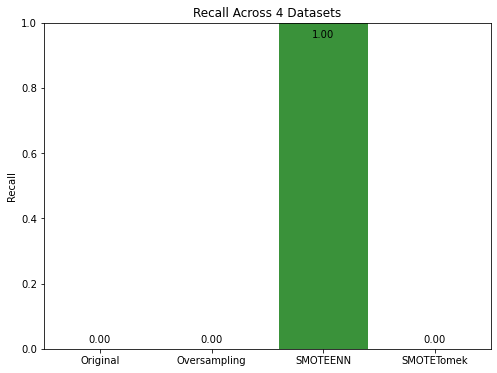

In [34]:
draw_figure(table1, 2, "Recall Across 4 Datasets")

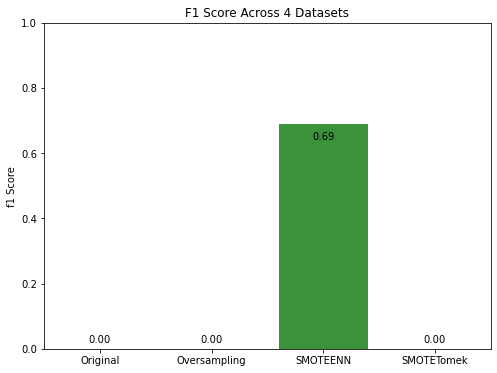

In [35]:
draw_figure(table1,3 ,"F1 Score Across 4 Datasets")

In [36]:
table2 = table2.set_axis(['Original','Oversampling','SMOTEENN','SMOTETomek'],axis = 1)
table2 = table2.set_axis(['Accuracy','Precision','Recall','f1 Score'],axis = 0)
#table2.to_csv('test.csv')
table2

,Original,Oversampling,SMOTEENN,SMOTETomek
Accuracy,0.777935,0.777935,0.222065,0.776992
Precision,0.000000,0.000000,0.222065,0.000000
Recall,0.000000,0.000000,1.000000,0.000000
f1 Score,0.000000,0.000000,0.363426,0.000000


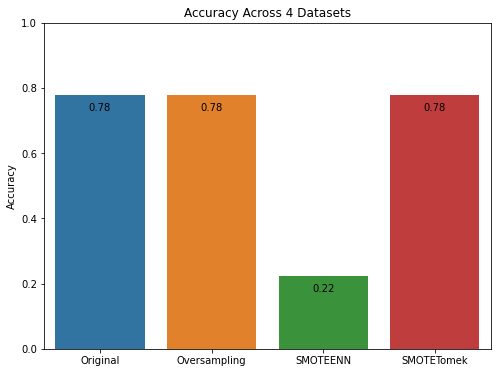

In [37]:
draw_figure(table2, 0, "Accuracy Across 4 Datasets")

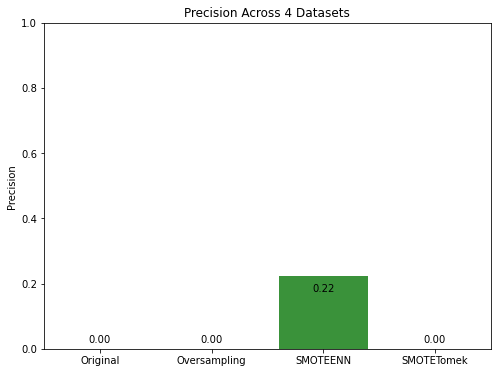

In [38]:
draw_figure(table2, 1, "Precision Across 4 Datasets")

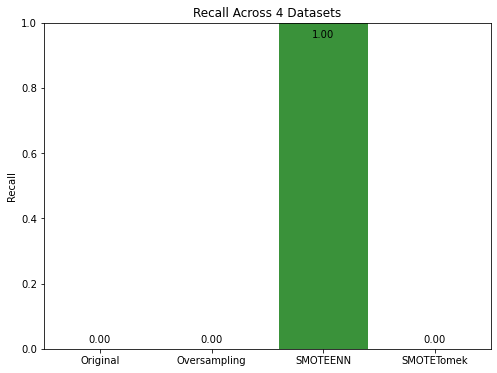

In [39]:
draw_figure(table2, 2, "Recall Across 4 Datasets")

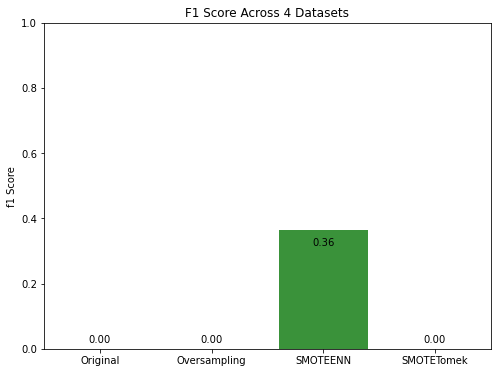

In [40]:
draw_figure(table2, 3, "F1 Score Across 4 Datasets")